In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean
import matplotlib as mpl

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [3]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [4]:
no_files = len(os.listdir(PATH_32x17+'DataCubes'))
no_files

163

In [8]:
df = pd.DataFrame(columns = ['H_32x85','H_64x85','H_32x17'])

for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
df

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [11:47<00:00,  4.34s/it]


,H_32x85,H_64x85,H_32x17
52035,1.076944,0.909766,0.972530
52036,1.076663,0.912389,0.971698
52037,1.075903,0.914908,0.970806
52038,1.074950,0.917539,0.969760
52039,1.074120,0.919925,0.968602
...,...,...,...
1994172,1.089692,0.893221,0.988474
1994173,1.088516,0.891059,0.988476
1994174,1.087894,0.888928,0.988498
1994175,1.087222,0.886985,0.988598


100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [12:36<00:00,  4.64s/it]


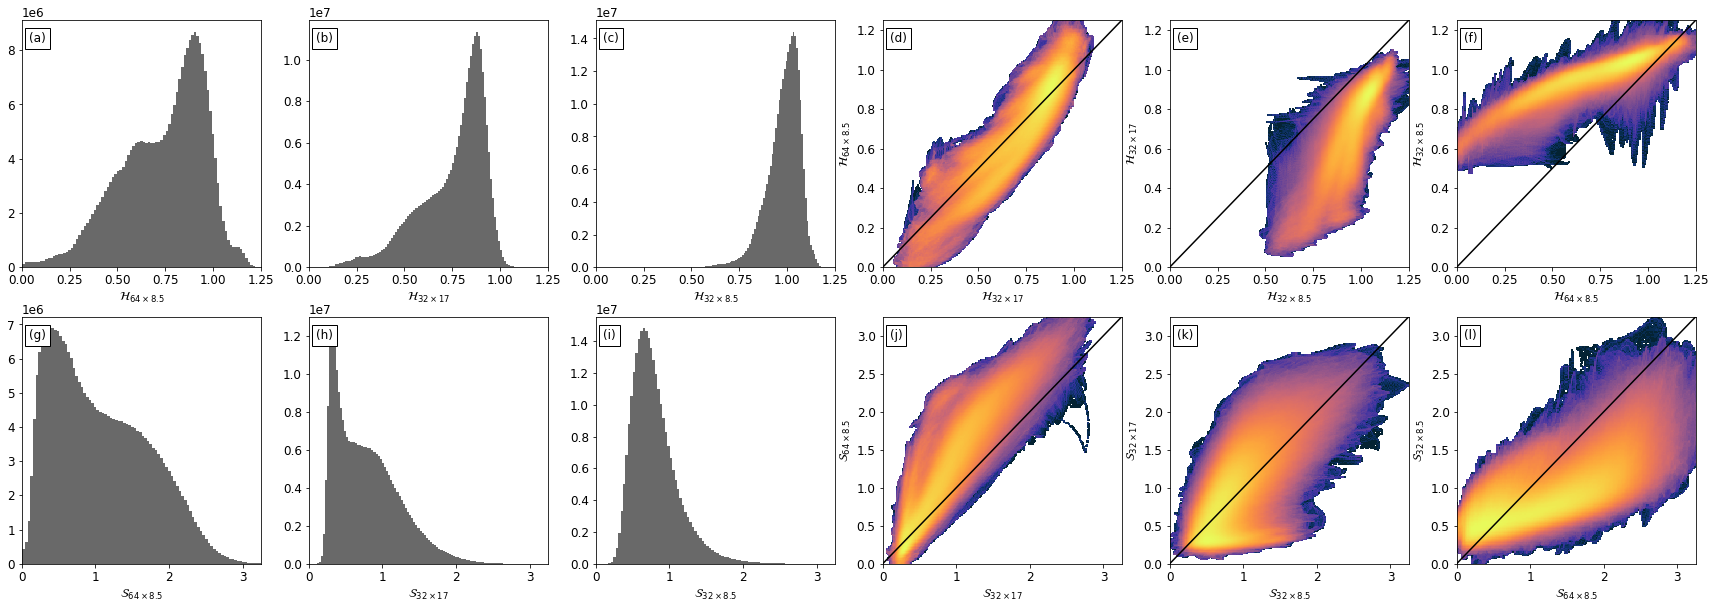

In [16]:
plt.rcParams.update({'font.size': 12})
f,ax = plt.subplots(2,6, figsize=(30,10))

# H

ax[0,0].hist(df['H_64x85'], bins=100, facecolor='dimgrey')
ax[0,0].set_xlabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[0,0].text(0.03, 0.91, '(a)', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].set_xlim([0,1.25])

ax[0,1].hist(df['H_32x17'], bins=100, facecolor='dimgrey')
ax[0,1].set_xlabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,1].text(0.03, 0.91, '(b)', transform=ax[0,1].transAxes,bbox = dict(facecolor='white'))
ax[0,1].set_xlim([0,1.25])

ax[0,2].hist(df['H_32x85'], bins=100, facecolor='dimgrey')
ax[0,2].set_xlabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[0,2].text(0.03, 0.91, '(c)', transform=ax[0,2].transAxes,bbox = dict(facecolor='white'))
ax[0,2].set_xlim([0,1.25])

ax[0,3].hist2d(df['H_32x17'],df['H_64x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,3].set_xlabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,3].set_ylabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[0,3].text(0.03, 0.91, '(d)', transform=ax[0,3].transAxes,bbox = dict(facecolor='white'))
ax[0,3].plot([0,2],[0,2],c='k')
ax[0,3].set_xlim([0,1.25])
ax[0,3].set_ylim([0,1.25])

ax[0,4].hist2d(df['H_32x85'],df['H_32x17'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,4].set_xlabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[0,4].set_ylabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,4].text(0.03, 0.91, '(e)', transform=ax[0,4].transAxes,bbox = dict(facecolor='white'))
ax[0,4].plot([0,2],[0,2],c='k')
ax[0,4].set_xlim([0,1.25])
ax[0,4].set_ylim([0,1.25])

ax[0,5].hist2d(df['H_64x85'],df['H_32x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,5].set_xlabel(r'$\mathcal{H}_{64 \times 8.5}$')
ax[0,5].set_ylabel(r'$\mathcal{H}_{32 \times 8.5}$')
ax[0,5].text(0.03, 0.91, '(f)', transform=ax[0,5].transAxes,bbox = dict(facecolor='white'))
ax[0,5].plot([0,2],[0,2],c='k')
ax[0,5].set_xlim([0,1.25])
ax[0,5].set_ylim([0,1.25])

# S

df = pd.DataFrame(columns = ['S_32x85','S_64x85','S_32x17'])

for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
    
ax[1,0].hist(df['S_64x85'], bins=100, facecolor='dimgrey')
ax[1,0].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[1,0].text(0.03, 0.91, '(g)', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].set_xlim([0,3.25])

ax[1,1].hist(df['S_32x17'], bins=100, facecolor='dimgrey')
ax[1,1].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,1].text(0.03, 0.91, '(h)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].set_xlim([0,3.25])

ax[1,2].hist(df['S_32x85'], bins=100, facecolor='dimgrey')
ax[1,2].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[1,2].text(0.03, 0.91, '(i)', transform=ax[1,2].transAxes,bbox = dict(facecolor='white'))
ax[1,2].set_xlim([0,3.25])

ax[1,3].hist2d(df['S_32x17'],df['S_64x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,3].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,3].set_ylabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[1,3].text(0.03, 0.91, '(j)', transform=ax[1,3].transAxes,bbox = dict(facecolor='white'))
ax[1,3].plot([0,4],[0,4],c='k')
ax[1,3].set_xlim([0,3.25])
ax[1,3].set_ylim([0,3.25])

ax[1,4].hist2d(df['S_32x85'],df['S_32x17'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,4].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[1,4].set_ylabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,4].text(0.03, 0.91, '(k)', transform=ax[1,4].transAxes,bbox = dict(facecolor='white'))
ax[1,4].plot([0,4],[0,4],c='k')
ax[1,4].set_xlim([0,3.25])
ax[1,4].set_ylim([0,3.25])

ax[1,5].hist2d(df['S_64x85'],df['S_32x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,5].set_xlabel(r'$\mathcal{S}_{64 \times 8.5}$')
ax[1,5].set_ylabel(r'$\mathcal{S}_{32 \times 8.5}$')
ax[1,5].text(0.03, 0.91, '(l)', transform=ax[1,5].transAxes,bbox = dict(facecolor='white'))
ax[1,5].plot([0,4],[0,4],c='k')
ax[1,5].set_xlim([0,3.25])
ax[1,5].set_ylim([0,3.25])

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/Distributions.png',bbox_inches="tight")
plt.show()

In [5]:
df = pd.DataFrame(columns = ['ColumnDensity','H_32px','H_64px','S_64px','S_32px', 'H_64px_smooth', 'S_64px_smooth', 'Lon','Lat'])

for i in tqdm(range(no_files)):
    cube_64px = pickle.load(open(f'{PATH_64PX}/DataCubes/{os.listdir(PATH_64PX+"DataCubes")[i]}','rb'))
    cube_32px = pickle.load(open(f'{PATH_32PX}/DataCubes/{os.listdir(PATH_32PX+"DataCubes")[i]}','rb'))
    cube_64px_smooth = pickle.load(open(f'{PATH_64PX_SMOOTH}/DataCubes/{os.listdir(PATH_64PX_SMOOTH+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_64px[0].flatten()
    temp_df['H_64px'] = np.pad(cube_64px[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64px'] = np.pad(cube_64px[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32px'] = np.pad(cube_32px[1],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32px'] = np.pad(cube_32px[2],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_64px_smooth'] = np.pad(cube_64px_smooth[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64px_smooth'] = np.pad(cube_64px_smooth[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten() 
    temp_df['Lon'] = cube_64px[3].flatten()
    temp_df['Lat'] = cube_64px[4].flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
    
df

 94%|█████████████████████████████████████████████████████████████████████▉    | 154/163 [18:28:44<1:04:47, 431.98s/it]


MemoryError: Unable to allocate 7.87 GiB for an array with shape (4, 263910637) and data type float64

In [39]:
np.pad(cube_64px[1],((31,32),(31,32)), 'constant', constant_values = np.nan).shape

(1440, 1440)

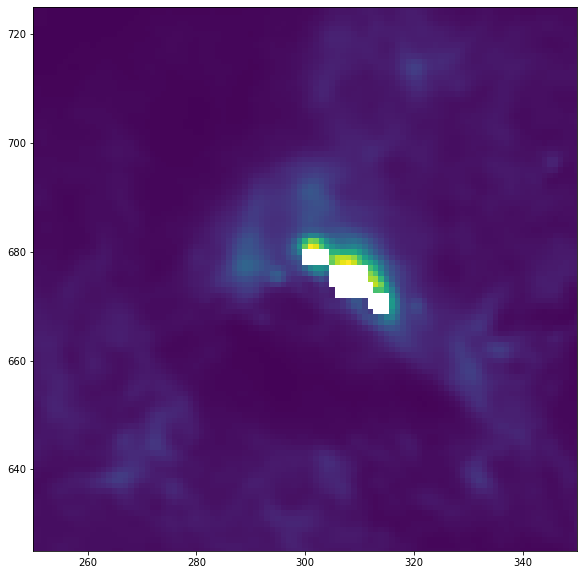

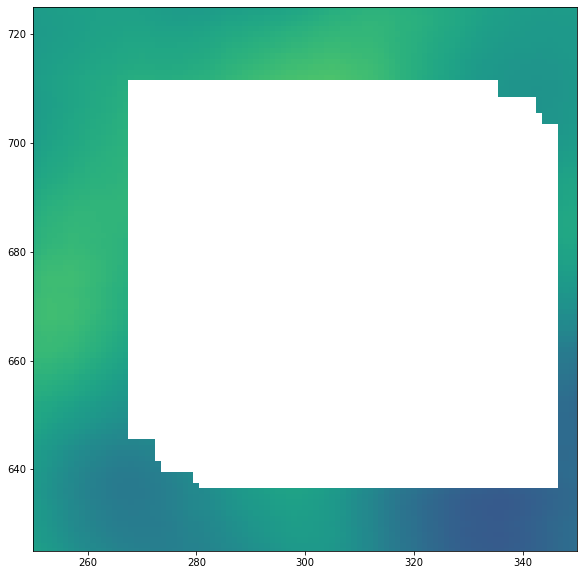

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(cube_32px[0], origin = 'lower')
# plt.xlim(250,350)
# plt.ylim(625,725)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(np.pad(cube_32px[1],((15,16),(15,16)), 'constant', constant_values = np.nan), origin = 'lower')
# plt.xlim(250,350)
# plt.ylim(625,725)
plt.show()